# Solving Systems of Linear Equations - 2 Variables

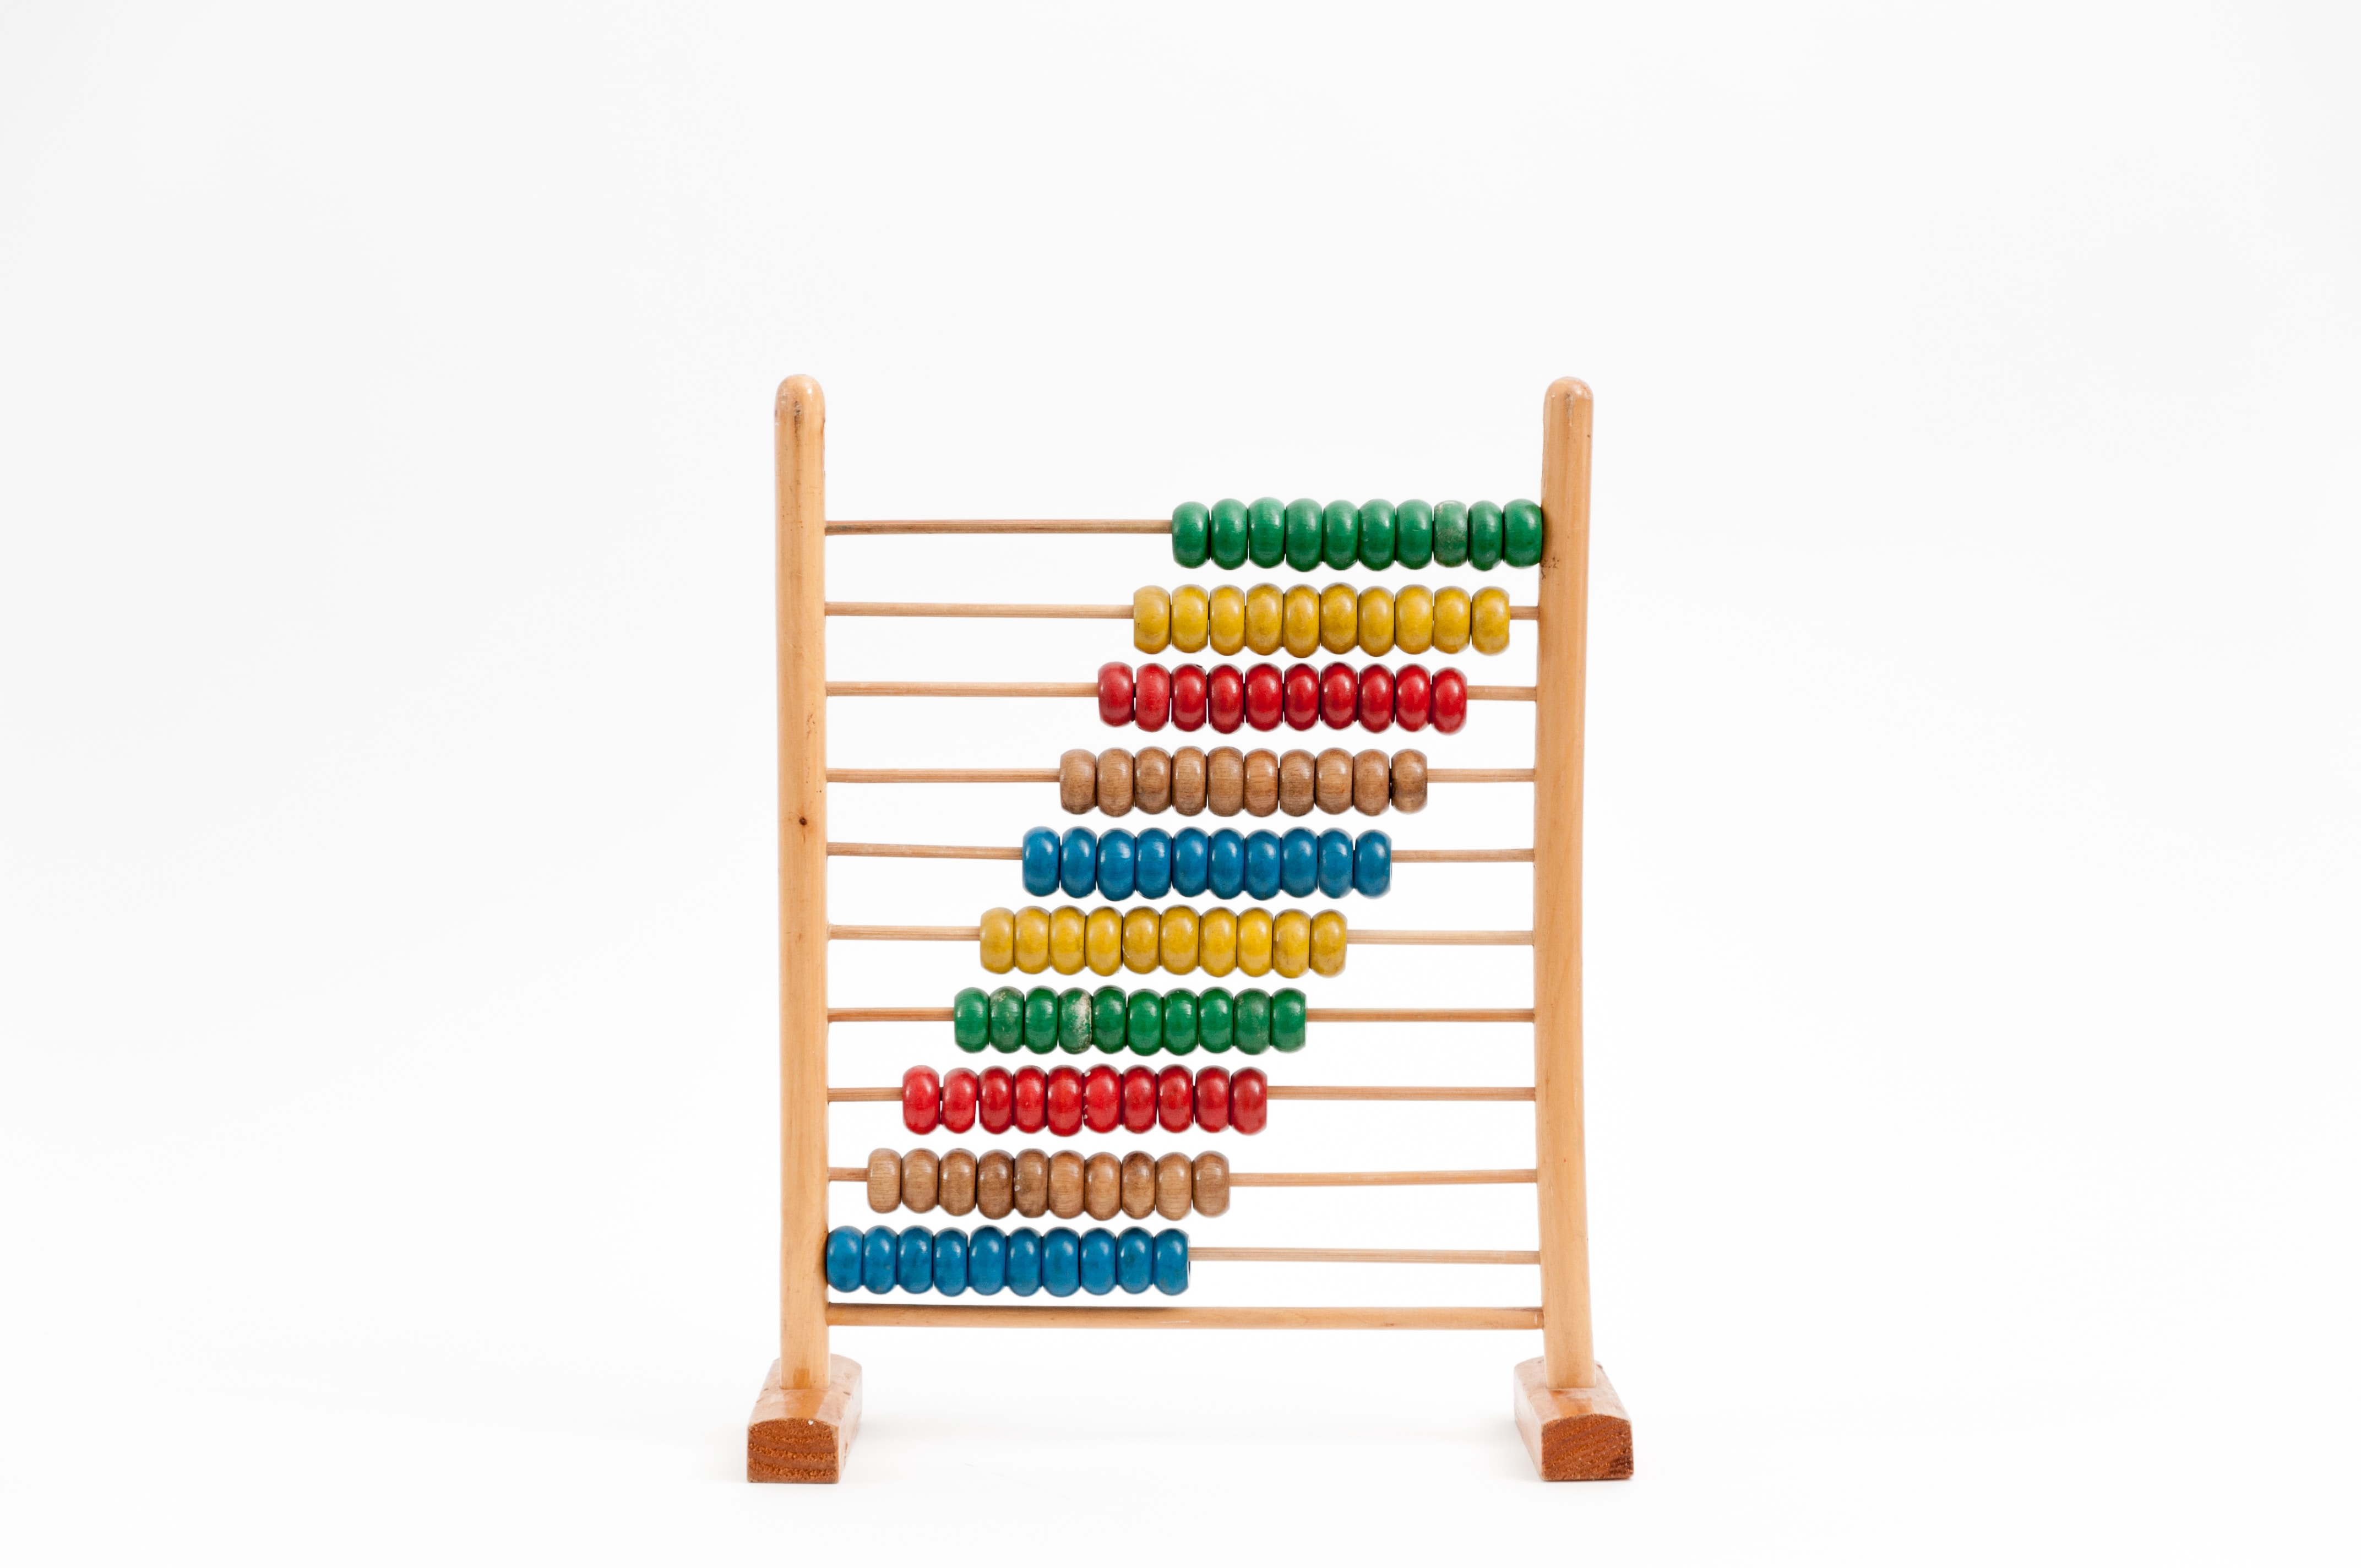
This Notebook Covers:
- Using NumPy's linear algebra package to find solutions to systems of linear equations
- Finding the determinant of a matrix 
- Using elimination method to find solutions to systems of linear equations
- Examining the relationship between matrix singularity and number of solutions of the linear system

## 1. Using NumPy's linear algebra package to solve systems of linear equations 

#### Quiz 

- You bought an apple and a banana and they cost 10 dollars
- You bought an apple and two bananas and they cost 12 dollars 

Question: How much does each fruit cost?

EQUATION <br> 
a + b = 10 <br> 
a + 2b = 12

### Packages
Load the NumPy package to access its functions

In [1]:
import numpy as np

### USING MATRICES

In [2]:
prices = np.array([[1,1],[1,2]], dtype = np.dtype(int))
total = np.array([10,12], dtype = np.dtype(int))

In [3]:
prices

array([[1, 1],
       [1, 2]])

In [4]:
total

array([10, 12])

In [5]:
prices.shape

(2, 2)

In [6]:
total.shape

(2,)

### USING np.linalg.solve(matrix values, solutions) function to solve the system

In [7]:
np.linalg.solve(prices,total)

array([8., 2.])

## 2. Finding the determinant of a matrix 
Here we use the np.linald.det(matrix) function

In [8]:
np.linalg.det(prices)

1.0

Note that its value is non-zero, as expected for a system with exactly one solution; this system in non-singular.

## 3. Using elimination method to find solutions to systems of linear equations

### Using the equation: 
5a + b = 17 <br> 
4a - 3b = 6

#### Step 1 - Eliminate a from the the equations  by dividing by coefficient of a
**Result:** <br>
a + 0.2b = 3.4 <br>
a - 0.75b = 1.5

#### Step 2 - Subtract equation 1 from equation 2
**Result:** <br>
0a - 0.95b = - 1.9

#### Step 3 - Solve for b 
-0.95b = - 1.9 <br>
b = 2

#### Step 4 - Solve for a
a + 0.2(2) = 3.4 <br>
a + 0.4 = 3.4 <br>
a = 3

### 3.1 Preparation for Implementation of Elimination Method in the Code

Representing the system in a matrix form as:

$
\begin{bmatrix}
5 & 1 & 17 \\
4 & -3 & 6
\end{bmatrix}
$

We can apply the same operations to the rows of the matrix with Python code

#### We will be:
1. Unifying two matrices(variables and constants) using `np.hstack()` function. 
2. Using `np.reshape()` to ensure both matrices are compatible

In [9]:
main = np.array([[5,1],[4,-3]],dtype = np.dtype(float))
vals = np.array([17,6],dtype=np.dtype(float))

In [10]:
main

array([[ 5.,  1.],
       [ 4., -3.]])

In [11]:
vals

array([17.,  6.])

In [12]:
main.shape

(2, 2)

In [13]:
vals.shape

(2,)

In [14]:
vals = np.reshape(vals, (2,1))

In [15]:
vals.shape

(2, 1)

In [16]:
system = np.hstack((main,vals))
system

array([[ 5.,  1., 17.],
       [ 4., -3.,  6.]])

### 3.2 Implementation of Elimination Method in the Code

In [17]:
# Make a copy 
system_copy = system.copy()
system_copy

array([[ 5.,  1., 17.],
       [ 4., -3.,  6.]])

In [18]:
system_copy[0]

array([ 5.,  1., 17.])

In [19]:
# Step 1 - Eliminate a from the the equations  by dividing by coefficient of a
system_copy[0] = system_copy[0] / system_copy[0,0]
system_copy[0]

array([1. , 0.2, 3.4])

In [20]:
system_copy

array([[ 1. ,  0.2,  3.4],
       [ 4. , -3. ,  6. ]])

In [21]:
system_copy[1] = system_copy[1] / system_copy[1,0]
system_copy[1]

array([ 1.  , -0.75,  1.5 ])

In [22]:
# current system
system_copy

array([[ 1.  ,  0.2 ,  3.4 ],
       [ 1.  , -0.75,  1.5 ]])

In [23]:
# Step 2 - Subtract equation 1 from equation 2
b = system_copy[1] - system_copy[0]
b

array([ 0.  , -0.95, -1.9 ])

In [24]:
# Step 3 - Solve for b
b = b[2]/b[1]
b

2.0

In [25]:
# Step 4 - Solve for a
system_copy[0]

array([1. , 0.2, 3.4])

In [26]:
a = system_copy[0,2] - (system_copy[0,1]*b)
a

3.0

## Graphical Representation of the solution

In [27]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

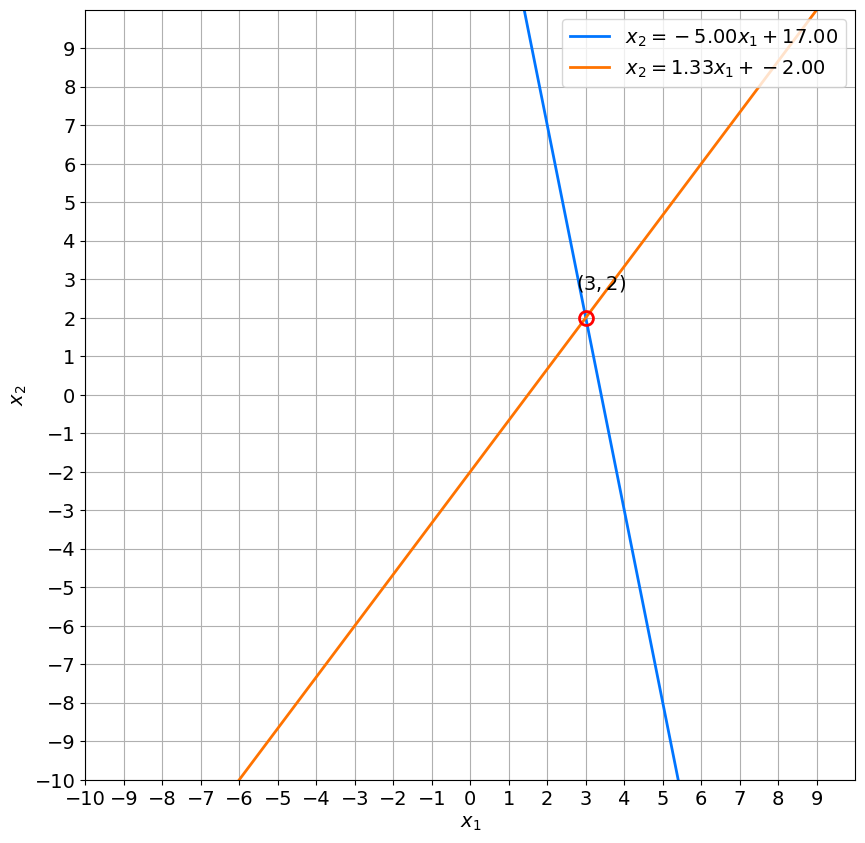

In [28]:
plot_lines(system)

## Bonus - Systems with No Solutions

In [29]:
A = np.array([[-1, 3],[3, -9]], dtype=np.dtype(float))
b = np.array([7, 1], dtype=np.dtype(float))

In [30]:
A

array([[-1.,  3.],
       [ 3., -9.]])

In [31]:
b

array([7., 1.])

In [32]:
np.linalg.det(A)

0.0

The determinant is 0; this system in singular 

In [33]:
# running - np.linalg.solve(A,b) will give a linAlgError, instead we use try except:
try:
    np.linalg.solve(A,b)
except np.linalg.LinAlgError as error:
    print(error)

Singular matrix


In [34]:
A

array([[-1.,  3.],
       [ 3., -9.]])

In [35]:
b

array([7., 1.])

In [36]:
b = np.reshape(b,(2,1))
b.shape

(2, 1)

In [37]:
matrix2 = np.hstack((A,b))
matrix2

array([[-1.,  3.,  7.],
       [ 3., -9.,  1.]])

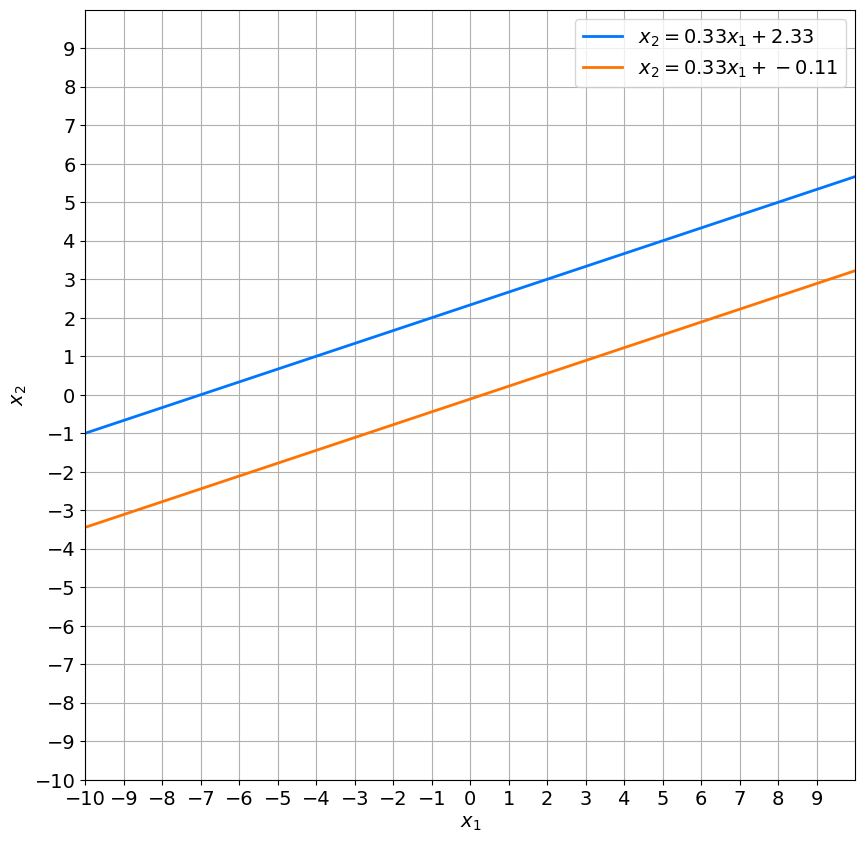

In [38]:
plot_lines(matrix2)

## BONUS 2 - System of Linear Equations with Infinite Number of Solutions

In [39]:
b2 = np.array([7, -21], dtype=np.dtype(float))

In [40]:
b2.shape

(2,)

In [41]:
b2 = np.reshape(b2,(2,1))

In [42]:
matrix3 = np.hstack((A,b2))
matrix3

array([[ -1.,   3.,   7.],
       [  3.,  -9., -21.]])

Elimination Method

In [43]:
# copy() matrix.
copy2 = matrix3.copy()

# Multiply row 0 by 3 and add it to the row 1.
copy2[1] = 3 * copy2[0] + copy2[1]
print(copy2)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


In [44]:
np.linalg.det(A)

0.0

The determinant is 0; this system in singular 

In [45]:
try:
    np.linalg.solve(A,b2)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


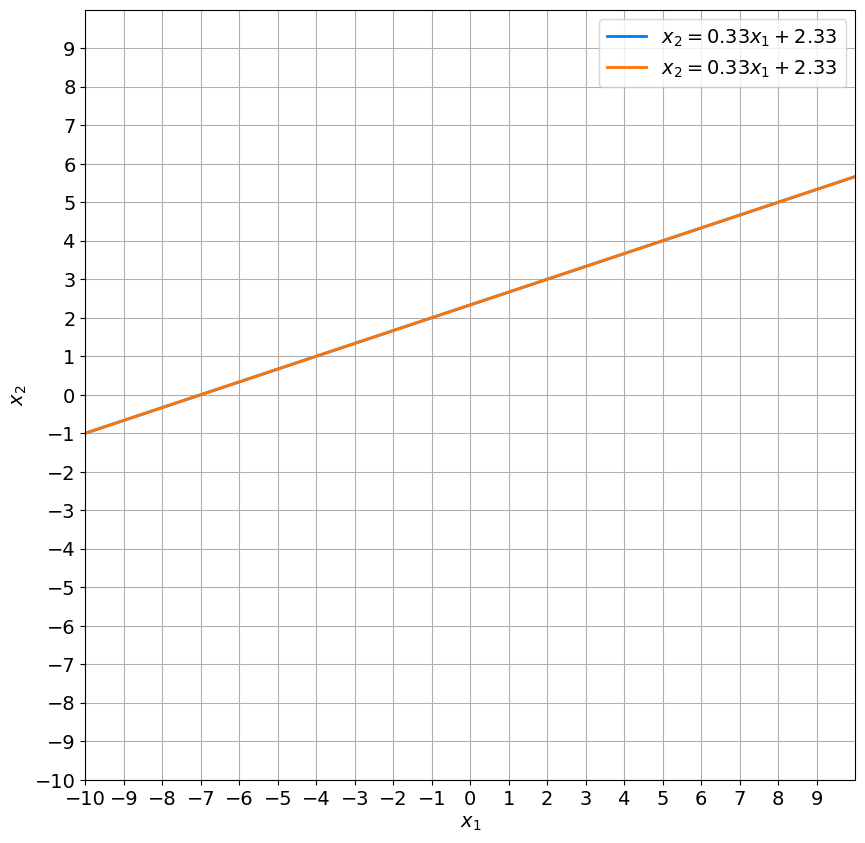

In [46]:
plot_lines(matrix3)

Thank You!